In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import matplotlib as mpl

mpl.rcParams['font.size']=14

In [2]:
import os
sc_num_cs_dist = np.zeros((50, 25))
sc_num_vs_dist = np.zeros((50, 25))
sc_num_err = np.zeros((50,25))

directory_ori = '/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/out/'
for subdir, dirs, files in os.walk(directory_ori):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_000000" in filename) and ("_process.nc") in filename:
            i = int(filename[-13:-11])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sc_edges = ncf.variables["sc_edges"].data.copy() * 100
            # sc_num_dist[:, i-1] = ncf.variables["sc_varying_sigma_dist"].data.copy()
            sc_num_cs_dist[:, i-1] = ncf.variables["sc_dist"].data.copy()
            sc_num_vs_dist[:, i-1] = ncf.variables["sc_varying_sigma_dist"].data.copy()


In [3]:
sc_edges

array([1.00000000e-02, 1.20226443e-02, 1.44543977e-02, 1.73780083e-02,
       2.08929613e-02, 2.51188643e-02, 3.01995172e-02, 3.63078055e-02,
       4.36515832e-02, 5.24807460e-02, 6.30957344e-02, 7.58577575e-02,
       9.12010839e-02, 1.09647820e-01, 1.31825674e-01, 1.58489319e-01,
       1.90546072e-01, 2.29086765e-01, 2.75422870e-01, 3.31131121e-01,
       3.98107171e-01, 4.78630092e-01, 5.75439937e-01, 6.91830971e-01,
       8.31763771e-01, 1.00000000e+00, 1.20226443e+00, 1.44543977e+00,
       1.73780083e+00, 2.08929613e+00, 2.51188643e+00, 3.01995172e+00,
       3.63078055e+00, 4.36515832e+00, 5.24807460e+00, 6.30957344e+00,
       7.58577575e+00, 9.12010839e+00, 1.09647820e+01, 1.31825674e+01,
       1.58489319e+01, 1.90546072e+01, 2.29086765e+01, 2.75422870e+01,
       3.31131121e+01, 3.98107171e+01, 4.78630092e+01, 5.75439937e+01,
       6.91830971e+01, 8.31763771e+01, 1.00000000e+02])

In [4]:
print(sc_edges[13])
print(sc_edges[19])
print(sc_edges[22])

0.10964781961431858
0.33113112148259133
0.575439937337157


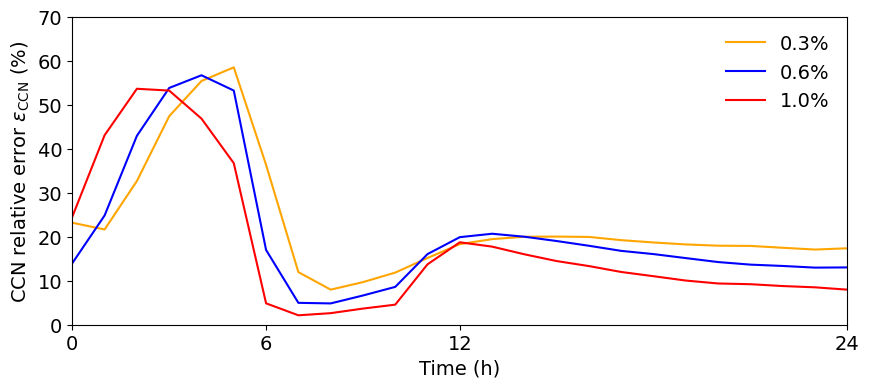

In [6]:
nc_cs_1 = np.sum(sc_num_cs_dist[:13,:],axis=0)
nc_cs_3 = np.sum(sc_num_cs_dist[:19,:],axis=0)
nc_cs_6 = np.sum(sc_num_cs_dist[:22,:],axis=0)
nc_cs_10 = np.sum(sc_num_cs_dist[:25,:],axis=0)
nc_vs_1 = np.sum(sc_num_vs_dist[:13,:],axis=0)
nc_vs_3 = np.sum(sc_num_vs_dist[:19,:],axis=0)
nc_vs_6 = np.sum(sc_num_vs_dist[:22,:],axis=0)
nc_vs_10 = np.sum(sc_num_vs_dist[:25,:],axis=0)

rel_err_1 = 100*(nc_cs_1 - nc_vs_1) / nc_vs_1
rel_err_3 = 100*(nc_cs_3 - nc_vs_3) / nc_vs_3
rel_err_6 = 100*(nc_cs_6 - nc_vs_6) / nc_vs_6
rel_err_10 = 100*(nc_cs_10 - nc_vs_10) / nc_vs_10

fig, ax = plt.subplots(figsize=(10, 4))

# ax.plot(np.linspace(0,24, 25), -rel_err_1, label='0.1%', c='green')
ax.plot(np.linspace(0,24, 25), -rel_err_3, label='0.3%', c='orange')
ax.plot(np.linspace(0,24, 25), -rel_err_6, label='0.6%', c='blue')
ax.plot(np.linspace(0,24, 25), -rel_err_10, label='1.0%', c='red')
# ax.plot(np.linspace(0,24, 25), nc_vs_1, ls='--', c='green')
# ax.plot(np.linspace(0,24, 25), nc_vs_3, ls='--', c='orange')
# ax.plot(np.linspace(0,24, 25), nc_vs_6, ls='--', c='blue'

ax.set_xlim(0, 24)
ax.set_ylim(0, 70)
ax.set_xticks([0, 6, 12, 24])
ax.legend(frameon=False)
ax.set_xlabel('Time (h)')
ax.set_ylabel(r'CCN relative error $\varepsilon_{\rm CCN}$ (%)')

plt.savefig('/data/keeling/a/xx24/d/proj_film/CCN_rel_err_time_series.pdf', bbox_inches='tight',dpi=300)